In [ ]:
# bam 파일 만드는 것은 galaxy software에서 진행함
# jupyter notebook에서는 python 사용할때만 진행함
# 리눅스 환경에서 사용한 명령어는 아래와 같음

# 대상 유전자로 MIR156C으로 선정
samtools view -b -o MIR156C-SRR517963.bam ./galaxy/SRR517963.bam chr4:15413000-15416000
samtools view MIR156C-SRR517963.bam |wc-l

# pileup 진행
samtools mpileup MIR156C-SRR517963.bam > MIR156C-SRR517963.pileup
wc -l MIR156C-SRR517963.pileup


In [11]:
import pandas as pd

pileup_MIR = pd.read_csv('MIR156C-SRR517963.pileup', sep='\t', names = ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'] )
pileup_MIR.tail(100)

,chrom,pos,_ref,count,basereads,quals
1071,chr4,15415574,N,0,*,*
1072,chr4,15415575,N,0,*,*
1073,chr4,15415576,N,0,*,*
1074,chr4,15415577,N,0,*,*
1075,chr4,15415578,N,0,*,*
...,...,...,...,...,...,...
1166,chr4,15415726,N,1,g,G
1167,chr4,15415727,N,1,a,G
1168,chr4,15415728,N,1,g,G
1169,chr4,15415729,N,1,g,G


In [12]:
import re
toremove = re.compile('[<>$*#^]')
pileup_MIR['matches'] = pileup_MIR['basereads'].apply(lambda x: toremove.sub('',x))

In [13]:
pileup_MIR[['chrom','pos','matches']]

,chrom,pos,matches
0,chr4,15413019,TT
1,chr4,15413020,AA
2,chr4,15413021,GG
3,chr4,15413022,GG
4,chr4,15413023,TT
...,...,...,...
1166,chr4,15415726,g
1167,chr4,15415727,a
1168,chr4,15415728,g
1169,chr4,15415729,g


In [14]:
pileup_MIR[pileup_MIR['pos'] == 15414000].iloc[0]['matches']

'TTTTT'

In [15]:
pileup_MIR['matches'].str.len()

0       2
1       2
2       2
3       2
4       2
       ..
1166    1
1167    1
1168    1
1169    1
1170    1
Name: matches, Length: 1171, dtype: int64

In [16]:
# shannon entropy 계산
import math
from collections import Counter

def shannon_entropy(dna_sequence):
    # 각 염기의 빈도수를 계산합니다.
    counts = Counter(dna_sequence)
    # 전체 염기의 수를 계산합니다.
    length = len(dna_sequence)

    # Shannon Entropy 계산
    entropy = 0.0
    for count in counts.values():
        probability = count / length
        if probability > 0:  # 확률이 0인 경우 log2가 정의되지 않으므로 건너뜁니다.
            entropy -= probability * math.log2(probability)

    return entropy

entropy_list = []

for i in range(0,1171):
  dna_sequence = pileup_MIR.loc[i]['matches']
  entropy = shannon_entropy(dna_sequence)
  entropy_list.append(entropy)

print (entropy_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.9182958340544896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.6500224216483541, 0.0, 0.0, 1.996623811079363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [17]:
# pileup3 만들기
pileup3_MIR = pileup_MIR[['chrom', 'pos']]
pileup3_MIR.rename(columns = {'chrom' : 'Chromosome', 'pos' : 'Start'}, inplace = True)
pileup3_MIR['End'] = pileup_MIR['pos']
pileup3_MIR['Entropy'] = entropy_list
pileup3_MIR

/tmp/ipykernel_41761/819991720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup3_MIR.rename(columns = {'chrom' : 'Chromosome', 'pos' : 'Start'}, inplace = True)
/tmp/ipykernel_41761/819991720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup3_MIR['End'] = pileup_MIR['pos']
/tmp/ipykernel_41761/819991720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Chromosome,Start,End,Entropy
0,chr4,15413019,15413019,0.0
1,chr4,15413020,15413020,0.0
2,chr4,15413021,15413021,0.0
3,chr4,15413022,15413022,0.0
4,chr4,15413023,15413023,0.0
...,...,...,...,...
1166,chr4,15415726,15415726,0.0
1167,chr4,15415727,15415727,0.0
1168,chr4,15415728,15415728,0.0
1169,chr4,15415729,15415729,0.0


<BarContainer object of 1171 artists>

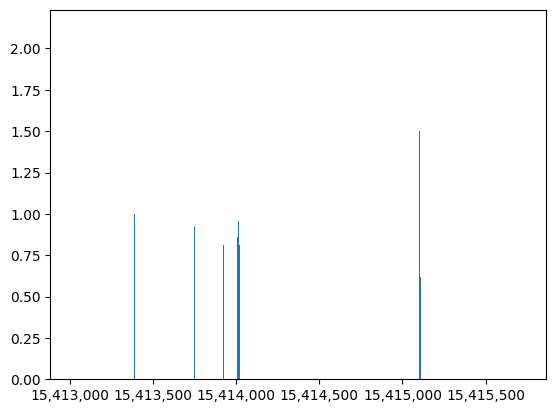

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    return f"{int(value):,}"

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.bar(pileup3_MIR['Start'], pileup3_MIR['Entropy'])

In [10]:
# 필요한 library 설치
!pip install fuc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 3.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.6 MB/s eta 0:00:004.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:005.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.4 MB/s eta 0:00:004.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9

In [12]:
# bed format으로 바꾸기
from fuc import pybed
bf = pybed.BedFrame.from_frame(meta=[], data=pileup3_MIR)
bf.to_file('pileup3_MIR.bed')

In [ ]:
# 리눅스 환경에서 진행한 명령어들
# 대상 유전자로 FLC으로 선정
samtools view -b -o FLC-SRR517963.bam ./galaxy/SRR517963.bam chr5:3173000-3178000
samtools view FLC-SRR517963.bam |wc-l

# pileup 진행
samtools mpileup FLC-SRR517963.bam > FLC-SRR517963.pileup
wc -l FLC-SRR517963.pileup

# 핵심 부분 추림 (MIR156C에서는 핵심부분이 추려지지 않아 이 부분을 생략함)
awk '$2 >= 3173382 && $2 <= 3179448 { print $0; }' FLC-SRR517963.pileup > FLC-SRR517963-gene.pileup
cat ./FLC-SRR517963-gene.pileup |wc -l

In [1]:
import pandas as pd

pileup_FLC = pd.read_csv('FLC-SRR517963-gene.pileup', sep='\t', names = ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'] )
pileup_FLC.tail(100)

,chrom,pos,_ref,count,basereads,quals
820,chr5,3175646,N,4,AAAA,IHHI
821,chr5,3175647,N,4,AAAA,IIHI
822,chr5,3175648,N,4,GGGG,IIIH
823,chr5,3175649,N,4,GGGG,HHIH
824,chr5,3175650,N,6,AAAA^9A^)A,IIIEIH
...,...,...,...,...,...,...
915,chr5,3176155,N,0,*,*
916,chr5,3176156,N,0,*,*
917,chr5,3176157,N,0,*,*
918,chr5,3176158,N,0,*,*


In [3]:
import re
toremove = re.compile('[<>$*#^]')
pileup_FLC['matches'] = pileup_FLC['basereads'].apply(lambda x: toremove.sub('',x))

In [10]:
pd.set_option('display.max_rows', None)

In [4]:
pileup_FLC[['chrom','pos','matches']]

,chrom,pos,matches
0,chr5,3173542,!C!C!C
1,chr5,3173543,AAA
2,chr5,3173544,GGG
3,chr5,3173545,AAA
4,chr5,3173546,TTT)T)T)T
...,...,...,...
915,chr5,3176155,
916,chr5,3176156,
917,chr5,3176157,
918,chr5,3176158,


In [6]:
pileup_FLC[pileup_FLC['pos'] == 3174249].iloc[0]['matches']

'CCCCC9C9C9C'

In [7]:
pileup_FLC['matches'].str.len()

0      6
1      3
2      3
3      3
4      9
      ..
915    0
916    0
917    0
918    0
919    0
Name: matches, Length: 920, dtype: int64

In [8]:
# shannon entropy 계산
import math
from collections import Counter

def shannon_entropy(dna_sequence):
    # 각 염기의 빈도수를 계산합니다.
    counts = Counter(dna_sequence)
    # 전체 염기의 수를 계산합니다.
    length = len(dna_sequence)

    # Shannon Entropy 계산
    entropy = 0.0
    for count in counts.values():
        probability = count / length
        if probability > 0:  # 확률이 0인 경우 log2가 정의되지 않으므로 건너뜁니다.
            entropy -= probability * math.log2(probability)

    return entropy

entropy_list = []

for i in range(0,920):
  dna_sequence = pileup_FLC.loc[i]['matches']
  entropy = shannon_entropy(dna_sequence)
  entropy_list.append(entropy)

print (entropy_list)

[1.0, 0.0, 0.0, 0.0, 0.9182958340544896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.954434002924965, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.863120568566631, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8112781244591328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [10]:
# pileup3 만들기
pileup3_FLC = pileup_FLC[['chrom', 'pos']]
pileup3_FLC.rename(columns = {'chrom' : 'Chromosome', 'pos' : 'Start'}, inplace = True)
pileup3_FLC['End'] = pileup_FLC['pos']
pileup3_FLC['Entropy'] = entropy_list
pileup3_FLC

/tmp/ipykernel_41761/3516579348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup3_FLC.rename(columns = {'chrom' : 'Chromosome', 'pos' : 'Start'}, inplace = True)
/tmp/ipykernel_41761/3516579348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup3_FLC['End'] = pileup_FLC['pos']
/tmp/ipykernel_41761/3516579348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Chromosome,Start,End,Entropy
0,chr5,3173542,3173542,1.000000
1,chr5,3173543,3173543,0.000000
2,chr5,3173544,3173544,0.000000
3,chr5,3173545,3173545,0.000000
4,chr5,3173546,3173546,0.918296
...,...,...,...,...
915,chr5,3176155,3176155,0.000000
916,chr5,3176156,3176156,0.000000
917,chr5,3176157,3176157,0.000000
918,chr5,3176158,3176158,0.000000


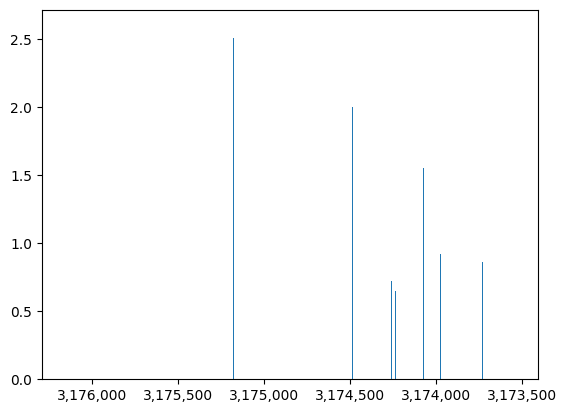

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    return f"{int(value):,}"

plt.bar(pileup3_FLC['Start'], pileup3_FLC['Entropy'])
plt.gca().invert_xaxis()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [17]:
# bed format으로 바꾸기
from fuc import pybed
bf = pybed.BedFrame.from_frame(meta=[], data=pileup3_FLC)
bf.to_file('FLC-pileup3.bed')